In [3]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [4]:
df=pd.read_csv("Titanic-dataset.csv")


In [5]:
import warnings
warnings.filterwarnings("ignore")

x=df
x.drop(['PassengerId', 'Sex', 'Cabin','Ticket','Name','Embarked'], axis=1, inplace=True)
x['Age'].fillna(x['Age'].median(), inplace=True)
x['Fare'].fillna(x['Fare'].median(), inplace=True)
x['Age'].fillna(x['Age'].median(), inplace=True)
y=df['Survived']
x.drop(['Survived'], axis=1, inplace=True)


In [6]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.8)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)



0.2291691996235241


In [8]:
y_pred = np.array(y_pred,dtype='int')


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.34409038419524984, 0.5865921787709497, 0.4337477378235896, None)


array([[105,   0],
       [ 74,   0]], dtype=int64)

<Axes: xlabel='Age', ylabel='Fare'>

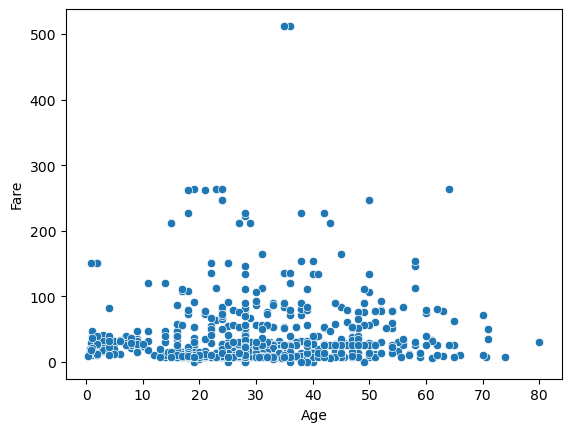

In [52]:
# # plt.figure(figsize=(10, 6))
# print(y_test,y_pred)
# plt.scatter(y_test, y_pred)
# # plt.plot(X_test[:,0], y_pred, c="red")
# plt.show()
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=y_data=df)


In [11]:
regr = LogisticRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)

0.7318435754189944


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.7395820006539015, 0.7318435754189944, 0.7180408586494387, None)


array([[94, 11],
       [37, 37]], dtype=int64)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(knn.score(X_test,y_test))

0.7094972067039106


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.7068734666324902, 0.7094972067039106, 0.7021742615256235, None)


array([[87, 18],
       [34, 40]], dtype=int64)

In [15]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
print(dtree.score(X_test, y_test))
y_pred = dtree.predict(X_test)

0.6368715083798883


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.6315314500260104, 0.6368715083798883, 0.6325770943664445, None)


array([[77, 28],
       [37, 37]], dtype=int64)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, random_state=0)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
y_pred=rf.predict(X_test)

0.7150837988826816


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.7120711103069233, 0.7150837988826816, 0.7117143355798257, None)


array([[84, 21],
       [30, 44]], dtype=int64)

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf")
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))
y_pred=svm.predict(X_test)


0.7430167597765364


In [20]:
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.7641126017752043, 0.7430167597765364, 0.7245614230605737, None)


array([[98,  7],
       [39, 35]], dtype=int64)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    model.fit(X, y)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    sns.set(style='whitegrid')
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression

X = x[['Age', 'Fare']].dropna()
y = y_train.loc[X.index]


model = LogisticRegression()
plot_decision_boundary(X, y, model, title='Logistic Regression Decision Boundary')


KeyError: '[5, 10, 23, 25, 30, 31, 33, 39, 44, 49, 54, 63, 65, 66, 67, 70, 72, 76, 77, 78, 82, 84, 86, 96, 97, 109, 110, 120, 136, 137, 139, 141, 165, 168, 174, 192, 196, 198, 204, 208, 209, 210, 211, 213, 215, 218, 227, 231, 235, 244, 250, 254, 266, 275, 280, 281, 286, 290, 291, 292, 294, 296, 299, 300, 306, 309, 311, 312, 319, 321, 323, 327, 333, 338, 342, 344, 350, 357, 359, 360, 362, 363, 375, 388, 396, 398, 408, 416, 417, 422, 426, 433, 439, 442, 446, 447, 448, 457, 462, 465, 477, 481, 485, 493, 494, 507, 512, 514, 518, 521, 527, 529, 532, 538, 539, 541, 545, 572, 578, 584, 585, 590, 591, 594, 599, 604, 605, 611, 620, 621, 625, 643, 652, 653, 657, 659, 668, 669, 670, 673, 682, 688, 696, 709, 712, 720, 736, 739, 767, 772, 773, 777, 778, 785, 790, 793, 796, 802, 808, 814, 819, 820, 822, 830, 833, 835, 837, 840, 842, 845, 849, 852, 853, 854, 876, 877, 885, 886, 889] not in index'